In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
import seaborn as sns

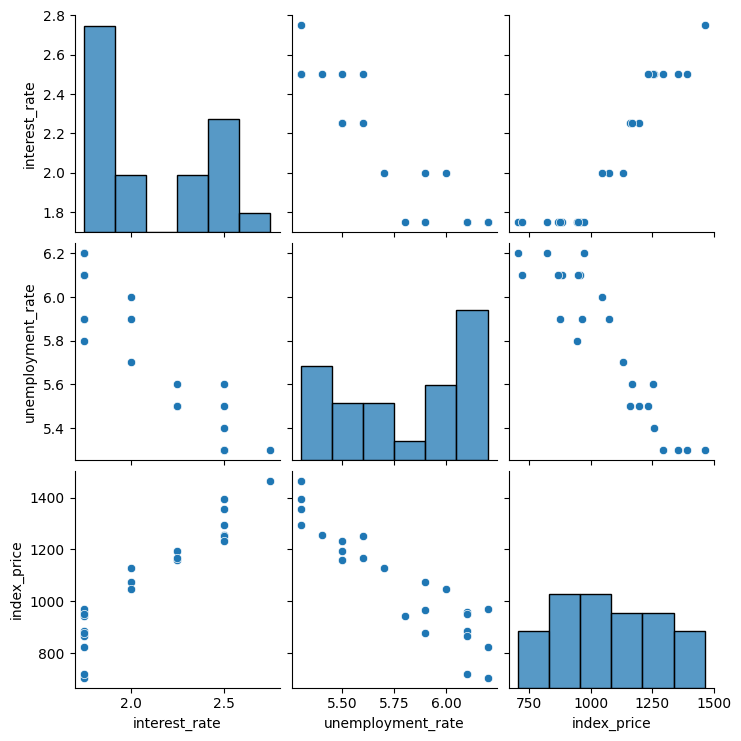

In [8]:
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


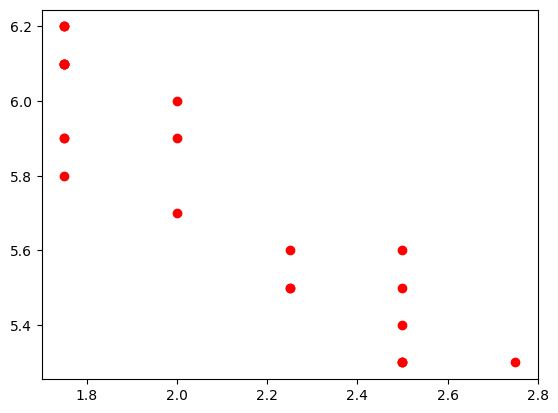

In [10]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="red")

In [11]:
## X=df_index[["interest_rate","unemployment_rate"]]
## OR
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


<Axes: xlabel='interest_rate', ylabel='index_price'>

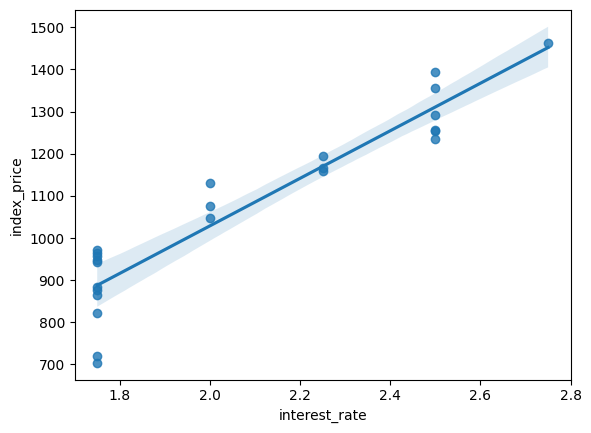

In [15]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression=LinearRegression()

In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
## cross validation , validation data set

from sklearn.model_selection import cross_val_score

In [26]:
validation_score = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [27]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [28]:
np.mean(validation_score)

-5914.828180162388

In [32]:
y_pred = regression.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [36]:
adugested_R2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adugested_R2

0.5985619231683761

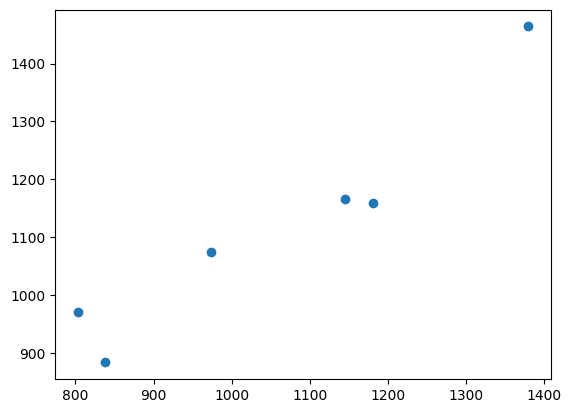

In [47]:
plt.scatter(y_pred,y_test)

In [ ]:
residuals=y_test-y_pred
print(residuals)

In [ ]:
## Plot this residuals
sns.displot(residuals,kind='kde')

In [ ]:
plt.scatter(y_pred,residuals)